## Calculating Descriptive Statistics 2
Start by importing all the packages you’ll need:

In [1]:
# from Python Statistics Fundamentals: How to Describe Your Data
# see also https://realpython.com/python-statistics/
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

## Measures of Variability
The measures of central tendency aren’t sufficient to describe data. You’ll also need the measures of variability that quantify the spread of data points. In this section, you’ll learn how to identify and calculate the following variability measures:

Variance
Standard deviation
Skewness
Percentiles
Ranges
Variance

The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. You can express the sample variance of the dataset 𝑥 with 𝑛 elements mathematically as 𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. If you want to understand deeper why you divide the sum with 𝑛 − 1 instead of 𝑛, then you can dive deeper into Bessel’s correction.

The following figure shows you why it’s important to consider the variance when describing datasets:

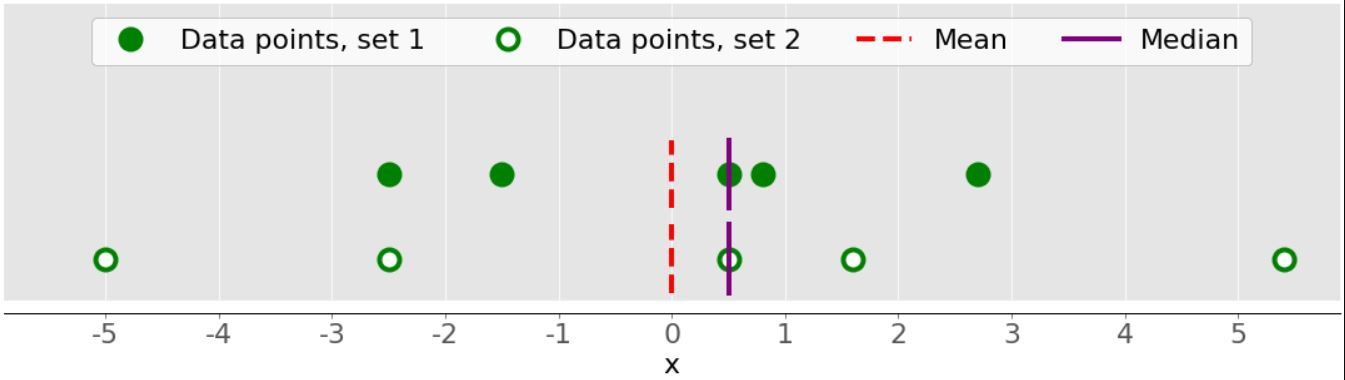

There are two datasets in this figure:

+ Green dots: This dataset has a smaller variance or a smaller average difference from the mean. It also has a smaller range or a smaller difference between the largest and smallest item.
+ White dots: This dataset has a larger variance or a larger average difference from the mean. It also has a bigger range or a bigger difference between the largest and smallest item.

Note that these two datasets have the same mean and median, even though they appear to differ significantly. Neither the mean nor the median can describe this difference. That’s why you need the measures of variability.

In [2]:
# define the arbitary data as used in the previous notebook
x = [8.0, 1, 2.5, 4, 28]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(x)
print(x_with_nan)
print(y)
print(z)

[8.0, 1, 2.5, 4, 28]
[8.0, 1, 2.5, nan, 4, 28.0]
[ 8.   1.   2.5  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64


Here’s how you can calculate the sample variance with pure Python:

In [3]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

This approach is sufficient and calculates the sample variance well. However, the shorter and more elegant solution is to call the existing function statistics.variance():

In [4]:
var_ = statistics.variance(x)
var_

123.2

You’ve obtained the same result for the variance as above. variance() can avoid calculating the mean if you provide the mean explicitly as the second argument: statistics.variance(x, mean_).

If you have nan values among your data, then statistics.variance() will return nan:

In [5]:
statistics.variance(x_with_nan)

nan

This behavior is consistent with mean() and most other functions from the Python statistics library.

You can also calculate the sample variance with NumPy. You should use the function np.var() or the corresponding method .var():

In [6]:
var_ = np.var(y, ddof=1)
print(var_)

var_ = y.var(ddof=1)
print(var_)

123.19999999999999
123.19999999999999


It’s very important to specify the parameter ddof=1. That’s how you set the delta degrees of freedom to 1. This parameter allows the proper calculation of 𝑠², with (𝑛 − 1) in the denominator instead of 𝑛.

If you have nan values in the dataset, then np.var() and .var() will return nan:

In [7]:
print(np.var(y_with_nan, ddof=1))

print(y_with_nan.var(ddof=1))


nan
nan


This is consistent with np.mean() and np.average(). If you want to skip nan values, then you should use np.nanvar():

In [8]:
print(np.nanvar(y_with_nan, ddof=1))

123.19999999999999


np.nanvar() ignores nan values. It also needs you to specify ddof=1.

pd.Series objects have the method .var() that skips nan values by default:

In [9]:
print(z.var(ddof=1))

print(z_with_nan.var(ddof=1))

123.19999999999999
123.19999999999999


It also has the parameter ddof, but its default value is 1, so you can omit it. If you want a different behavior related to nan values, then use the optional parameter skipna.

You calculate the population variance similarly to the sample variance. However, you have to use 𝑛 in the denominator instead of 𝑛 − 1: Σᵢ(𝑥ᵢ − mean(𝑥))² / 𝑛. In this case, 𝑛 is the number of items in the entire population. You can get the population variance similar to the sample variance, with the following differences:

+ Replace (n - 1) with n in the pure Python implementation.
+ Use statistics.pvariance() instead of statistics.variance().
+ Specify the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0.

Note that you should always be aware of whether you’re working with a sample or the entire population whenever you’re calculating the variance!

## Standard Deviation
The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points. Once you get the variance, you can calculate the standard deviation with pure Python:

In [10]:
std_ = var_ ** 0.5
std_

11.099549540409285

Although this solution works, you can also use statistics.stdev():

In [11]:
std_ = statistics.stdev(x)
std_

11.099549540409287

Of course, the result is the same as before. Like variance(), stdev() doesn’t calculate the mean if you provide it explicitly as the second argument: statistics.stdev(x, mean_).

You can get the standard deviation with NumPy in almost the same way. You can use the function std() and the corresponding method .std() to calculate the standard deviation. If there are nan values in the dataset, then they’ll return nan. To ignore nan values, you should use np.nanstd(). You use std(), .std(), and nanstd() from NumPy as you would use var(), .var(), and nanvar():

In [12]:
print(np.std(y, ddof=1))

print(y.std(ddof=1))

print(np.std(y_with_nan, ddof=1))

print(y_with_nan.std(ddof=1))

print(np.nanstd(y_with_nan, ddof=1))

11.099549540409285
11.099549540409285
nan
nan
11.099549540409285


Don’t forget to set the delta degrees of freedom to 1!

pd.Series objects also have the method .std() that skips nan by default:

In [13]:
print(z.std(ddof=1))

print(z_with_nan.std(ddof=1))

11.099549540409285
11.099549540409285


The parameter ddof defaults to 1, so you can omit it. Again, if you want to treat nan values differently, then apply the parameter skipna.

The population standard deviation refers to the entire population. It’s the positive square root of the population variance. You can calculate it just like the sample standard deviation, with the following differences:

+ Find the square root of the population variance in the pure Python implementation.
+ Use statistics.pstdev() instead of statistics.stdev().
+ Specify the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0.

As you can see, you can determine the standard deviation in Python, NumPy, and Pandas in almost the same way as you determine the variance. You use different but analogous functions and methods with the same arguments.

## Skewness
The sample skewness measures the asymmetry of a data sample.

There are several mathematical definitions of skewness. One common expression to calculate the skewness of the dataset 𝑥 with 𝑛 elements is (𝑛² / ((𝑛 − 1)(𝑛 − 2))) (Σᵢ(𝑥ᵢ − mean(𝑥))³ / (𝑛𝑠³)). A simpler expression is Σᵢ(𝑥ᵢ − mean(𝑥))³ 𝑛 / ((𝑛 − 1)(𝑛 − 2)𝑠³), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. The skewness defined like this is called the adjusted Fisher-Pearson standardized moment coefficient.

The previous figure showed two datasets that were quite symmetrical. In other words, their points had similar distances from the mean. In contrast, the following image illustrates two asymmetrical sets:

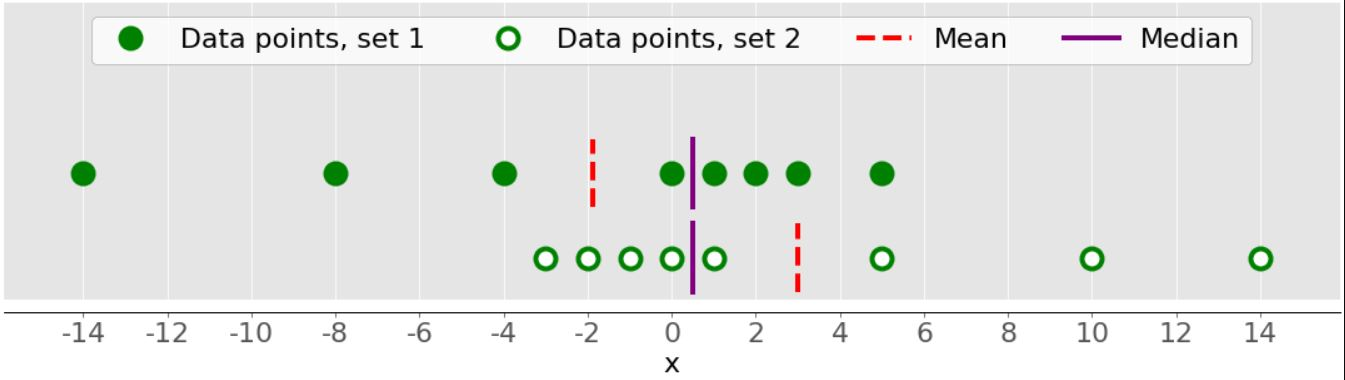

The first set is represented by the green dots and the second with the white ones. Usually, negative skewness values indicate that there’s a dominant tail on the left side, which you can see with the first set. Positive skewness values correspond to a longer or fatter tail on the right side, which you can see in the second set. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

Once you’ve calculated the size of your dataset n, the sample mean mean_, and the standard deviation std_, you can get the sample skewness with pure Python:

In [14]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
print(mean_)
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
print(var_)
std_ = var_ ** 0.5
print(std_)
skew_ = (sum((item - mean_)**3 for item in x)
         * n / ((n - 1) * (n - 2) * std_**3))
print(skew_)

8.7
123.19999999999999
11.099549540409285
1.9470432273905929


The skewness is positive, so x has a right-side tail.

You can also calculate the sample skewness with scipy.stats.skew():

In [15]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
print(scipy.stats.skew(y, bias=False))

print(scipy.stats.skew(y_with_nan, bias=False))

1.9470432273905927
nan


The obtained result is the same as the pure Python implementation. The parameter bias is set to False to enable the corrections for statistical bias. The optional parameter nan_policy can take the values 'propagate', 'raise', or 'omit'. It allows you to control how you’ll handle nan values.

Pandas Series objects have the method .skew() that also returns the skewness of a dataset:

In [16]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(z.skew())

print(z_with_nan.skew())

1.9470432273905924
1.9470432273905924


Like other methods, .skew() ignores nan values by default, because of the default value of the optional parameter skipna.

## Percentiles
The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. If there are two such elements in the dataset, then the sample 𝑝 percentile is their arithmetic mean. Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

+ The first quartile is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
+ The second quartile is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
+ The third quartile is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.

Each part has approximately the same number of items. If you want to divide your data into several intervals, then you can use statistics.quantiles():

In [17]:
# note older versions of python do not support quantiles, e.g.  AttributeError: module 'statistics' has no attribute 'quantiles'
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
a = statistics.quantiles(x, n=2)
print(a)
b = statistics.quantiles(x, n=4, method='inclusive')
print(b)

AttributeError: module 'statistics' has no attribute 'quantiles'

In this example, 8.0 is the median of x, while 0.1 and 21.0 are the sample 25th and 75th percentiles, respectively. The parameter n defines the number of resulting equal-probability percentiles, and method determines how to calculate them.

Note: statistics.quantiles() is introduced in Python 3.8.

You can also use np.percentile() to determine any sample percentile in your dataset. For example, this is how you can find the 5th and 95th percentiles:

In [18]:
y = np.array(x)
a = np.percentile(y, 5)
print(a)
b = np.percentile(y, 95)
print(b)

-3.44
34.919999999999995


percentile() takes several arguments. You have to provide the dataset as the first argument and the percentile value as the second. The dataset can be in the form of a NumPy array, list, tuple, or similar data structure. The percentile can be a number between 0 and 100 like in the example above, but it can also be a sequence of numbers:

In [19]:
print(y)

print(np.percentile(y, [25, 50, 75]))

np.median(y)

[-5.  -1.1  0.1  2.   8.  12.8 21.  25.8 41. ]
[ 0.1  8.  21. ]


8.0

This code calculates the 25th, 50th, and 75th percentiles all at once. If the percentile value is a sequence, then percentile() returns a NumPy array with the results. The first statement returns the array of quartiles. The second statement returns the median, so you can confirm it’s equal to the 50th percentile, which is 8.0.

If you want to ignore nan values, then use np.nanpercentile() instead:

In [20]:
y_with_nan = np.insert(y, 2, np.nan)
print(y_with_nan)

np.nanpercentile(y_with_nan, [25, 50, 75])

[-5.  -1.1  nan  0.1  2.   8.  12.8 21.  25.8 41. ]


array([ 0.1,  8. , 21. ])

That’s how you can avoid nan values.

NumPy also offers you very similar functionality in quantile() and nanquantile(). If you use them, then you’ll need to provide the quantile values as the numbers between 0 and 1 instead of percentiles:

In [21]:
print(np.quantile(y, 0.05))

print(np.quantile(y, 0.95))

print(np.quantile(y, [0.25, 0.5, 0.75]))

print(np.nanquantile(y_with_nan, [0.25, 0.5, 0.75]))

-3.44
34.919999999999995
[ 0.1  8.  21. ]
[ 0.1  8.  21. ]


The results are the same as in the previous examples, but here your arguments are between 0 and 1. In other words, you passed 0.05 instead of 5 and 0.95 instead of 95.

pd.Series objects have the method .quantile():

In [22]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
print(z.quantile(0.05))

print(z.quantile(0.95))

print(z.quantile([0.25, 0.5, 0.75]))

print(z_with_nan.quantile([0.25, 0.5, 0.75]))

-3.44
34.919999999999995
0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64
0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64


.quantile() also needs you to provide the quantile value as the argument. This value can be a number between 0 and 1 or a sequence of numbers. In the first case, .quantile() returns a scalar. In the second case, it returns a new Series holding the results.

## Ranges
The range of data is the difference between the maximum and minimum element in the dataset. You can get it with the function np.ptp():